<h1 align="center"><font color='green'>X Education</font></h1>

#### Porblem Statement :
X Education sells online courses to industry professionals.

Everyday many professionals who are interested in the courses land on their website and browse for courses.These users are classified as potential leads to take the course.

Currently the conversion rate is very poor. The company wishes to identify the most potential leads, also known as ‘Hot Leads’.

With the Hot Leads, the Sales team will focus more on communicating with the them rather than making calls to everyone.


#### Business Goal :
Help the X Education to select the most promising leads i.e. Hot Leads.

This can be achieved by building a logistic regression model and assigning lead score between 0 and 100 to each of the leads.

A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## <h2 align="left"> <font color='brown'>Importing the libraries</font></h2>

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [255]:
# import header
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
plt.style.use('seaborn')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Libraries for model creation, training and calculating VIF(for Multicollinearity)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

## <h2 align="left"> <font color='brown'>Reading Dataset</font></h2>

In [78]:
# Read datasets
leads = pd.read_csv('Leads.csv')

In [79]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [80]:
# Understanding the datasets
print('No. of Rows and columns :',leads.shape)


No. of Rows and columns : (9240, 37)


In [81]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [82]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [83]:
# columns can be dropped because these are unique numbers
drop_coulms = ['Prospect ID','Lead Number',]
leads.drop(drop_coulms,axis=1,inplace=True)

In [84]:
# columns can be dropped because these are not the key drivers
drop_coulms = ['Update me on Supply Chain Content','Get updates on DM Content',
               'I agree to pay the amount through cheque','Tags']
leads.drop(drop_coulms,axis=1,inplace=True)

In [213]:
# Rename the Column headers
leads.rename(columns = {"How did you hear about X Education":"HeardFrom"}, inplace=True)
leads.rename(columns = {"What matters most to you in choosing a course":"Moto"}, inplace=True)
leads.rename(columns = {"What is your current occupation":"Occupation"}, inplace=True)
leads.rename(columns = {"Receive More Updates About Our Courses":"GetUpdates"}, inplace=True)
leads.rename(columns={'A free copy of Mastering The Interview': 'Free_interview_copy'}, inplace=True)

In [86]:
#Categorical Values cleanup

leads['Asymmetrique Activity Index'] = leads['Asymmetrique Activity Index'].replace({'01.High': 'High', '02.Medium': 'Medium', '03.Low': 'Low'})
leads['Asymmetrique Profile Index'] = leads['Asymmetrique Activity Index'].replace({'01.High': 'High', '02.Medium': 'Medium', '03.Low': 'Low'})

In [87]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Country                                 6779 non-null   object 
 10  Specialization                          7802 non-null   obje


## <h2 align="left"> <font color='brown'>Impute/Remove missing values</font></h2>

In [88]:
# changing select to Nan
leads = leads.replace('Select',np.nan)

In [89]:
percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
percentage_null_values

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
HeardFrom                                 78.463203
Occupation                                29.112554
Moto                                      29.318182
Search                                     0.000000
Magazine                                   0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Adve

In [90]:
# Will remove those values having missing values more than 40 percent
def drop_cols():
  for col in leads.columns:
    if((100*(leads[col].isnull().sum()/len(leads.index))) >= 40):
      leads.drop(col,1, inplace=True)

In [91]:
drop_cols()

In [92]:
percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
percentage_null_values

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
Occupation                                29.112554
Moto                                      29.318182
Search                                     0.000000
Magazine                                   0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Advertisement                      0.000000
Through Reco

Further analysis on other missing values
#### Country

In [93]:
leads.Country.value_counts()
# Country is a categorical variable and we can see that mode of India is more. Hence will impute all the missing values to India

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [94]:
leads['Country'] = leads.Country.replace(np.nan,'India')
# Droping this column because data is highly skewed and pointing to India only. This will disbalance the dataset
leads.drop('Country',axis=1,inplace=True)

#### Specialization

In [95]:
leads.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [96]:
# Will distribute the null values in other categories of specialization
def impute_null_values(column_name,value):
  null_value = int(round(leads[column_name].isna().sum() / value))
  categories = leads[column_name].unique()
  filtered_array = categories[~pd.isna(categories)]
  for col_index in range(0,value):
    null_indices = leads[leads[column_name].isna()][column_name].index[:null_value]
    leads.loc[null_indices,column_name] = filtered_array[col_index]

In [97]:
impute_null_values('Specialization',10)

In [98]:
percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
percentage_null_values

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                             0.000000
Occupation                                29.112554
Moto                                      29.318182
Search                                     0.000000
Magazine                                   0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Advertisement                      0.000000
Through Recommendations                    0.000000
GetUpdates  

#### Occupation

In [99]:
leads['Occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [100]:
leads['Occupation'].isnull().sum()

2690

In [101]:
impute_null_values('Occupation',6)

In [102]:
leads.Occupation = leads.Occupation.replace(np.nan,'Unemployed')

In [103]:
percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
percentage_null_values

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                             0.000000
Occupation                                 0.000000
Moto                                      29.318182
Search                                     0.000000
Magazine                                   0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Advertisement                      0.000000
Through Recommendations                    0.000000
GetUpdates  

#### Motto

In [104]:
leads['Moto'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: Moto, dtype: int64

In [105]:
leads['Moto'].isnull().sum()

2709

In [106]:
# this is highly skewed.Hence dropping
leads.drop('Moto',axis=1,inplace=True)

In [107]:
percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
percentage_null_values

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                             0.000000
Occupation                                 0.000000
Search                                     0.000000
Magazine                                   0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Advertisement                      0.000000
Through Recommendations                    0.000000
GetUpdates                                 0.000000
City        

#### City

In [108]:
leads.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [109]:
leads.City.isnull().sum()

3669

In [110]:
# Skewness to Mumbai, hence can be dropped
leads.drop('City',axis=1,inplace=True)

In [111]:
percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
percentage_null_values

Lead Origin                               0.000000
Lead Source                               0.389610
Do Not Email                              0.000000
Do Not Call                               0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Specialization                            0.000000
Occupation                                0.000000
Search                                    0.000000
Magazine                                  0.000000
Newspaper Article                         0.000000
X Education Forums                        0.000000
Newspaper                                 0.000000
Digital Advertisement                     0.000000
Through Recommendations                   0.000000
GetUpdates                                0.000000
A free copy of Mastering The In

#### Lead Source

In [112]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [113]:
leads['Lead Source'].isnull().sum()

36

In [114]:
impute_null_values('Lead Source',6)

#### Last Activity

In [115]:
leads['Last Activity'].value_counts()


Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [116]:
leads['Last Activity'].isnull().sum()

103

In [117]:
impute_null_values('Last Activity',2)

#### TotalVisits

In [124]:
leads.TotalVisits.value_counts().head(10)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [126]:
leads.TotalVisits.isnull().sum()

0

In [127]:
leads['TotalVisits'] = leads.TotalVisits.replace(np.nan,TotalVisits.mode())

NameError: name 'TotalVisits' is not defined

#### Page Views Per Visit

In [131]:
leads[['Page Views Per Visit']].head()

,Page Views Per Visit
0,0.0
1,2.5
2,2.0
3,1.0
4,1.0


In [132]:
leads[['Page Views Per Visit']].isnull().sum()

Page Views Per Visit    0
dtype: int64

In [133]:
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan,leads['Page Views Per Visit'].mode())

ValueError: Series.replace cannot use dict-value and non-None to_replace

In [122]:
percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
percentage_null_values

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
Occupation                                0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
GetUpdates                                0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

# <h2 align="left"> <font color='brown'>Data Visualization</font></h2>

#### Numeric Variable

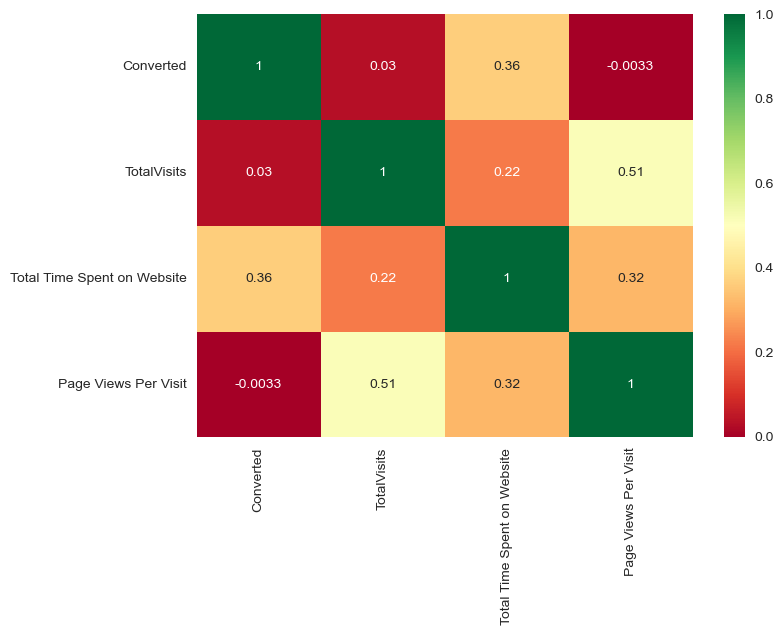

In [134]:
# Numerical Variables
num_category = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

sns.heatmap(leads[num_category].corr(), cmap="RdYlGn", annot=True)
plt.show()

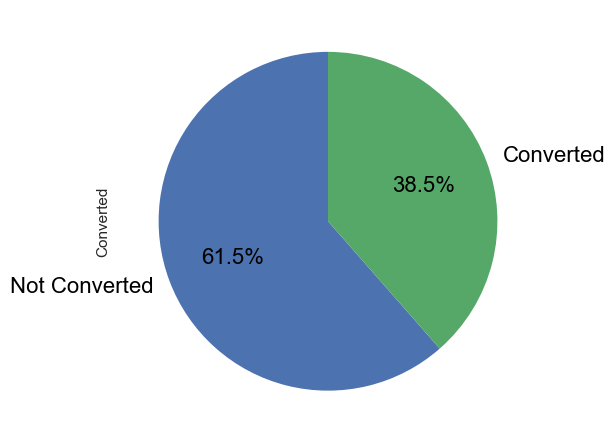

In [135]:
# Target
target = round(leads.Converted.value_counts(normalize=True)*100,2)
x = ['Not Converted','Converted']
target.plot.pie(labels=x,autopct='%1.1f%%',
                textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)
plt.show()

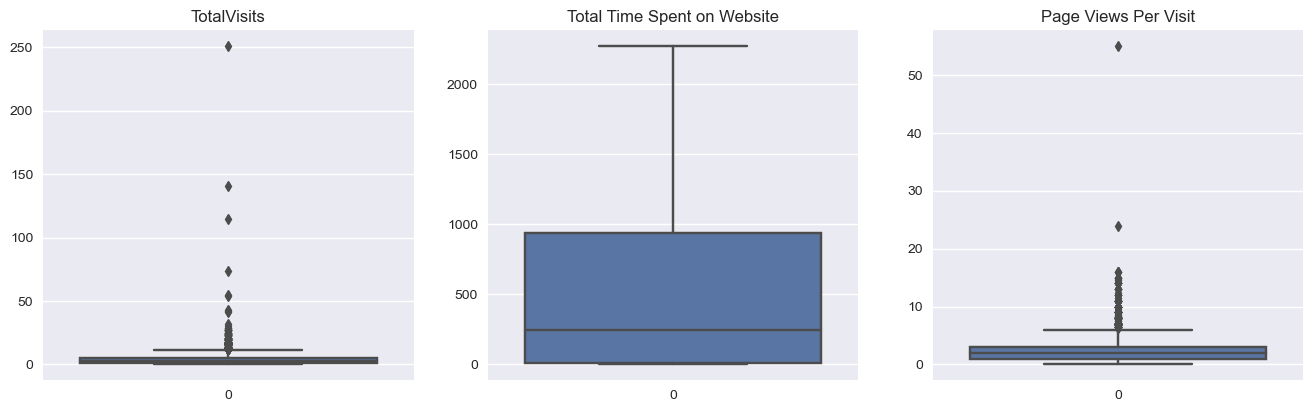

In [136]:
# Box plot
plt.figure(figsize=(22,10))
plt.subplot(2,4,1)
plt.title('TotalVisits')
sns.boxplot(leads.TotalVisits)
plt.subplot(2,4,2)
plt.title('Total Time Spent on Website')
sns.boxplot(leads['Total Time Spent on Website'])
plt.subplot(2,4,3)
plt.title('Page Views Per Visit')
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [137]:
# TotalVisits and Page Views Per Visit has outliers
leads[['TotalVisits','Page Views Per Visit']].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit
count,9240.000000,9240.000000
mean,3.445238,2.362820
std,4.818723,2.145333
min,0.000000,0.000000
5%,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
90%,7.000000,5.000000
95%,10.000000,6.000000


In [138]:
# Correcting outliers from medians
def replace_outliers_with_median(column,value):
  indices = leads[leads[column] > value].TotalVisits.index
  leads.loc[indices,column] = leads[column].median()



In [139]:
replace_outliers_with_median('Page Views Per Visit',9)
replace_outliers_with_median('TotalVisits',9)

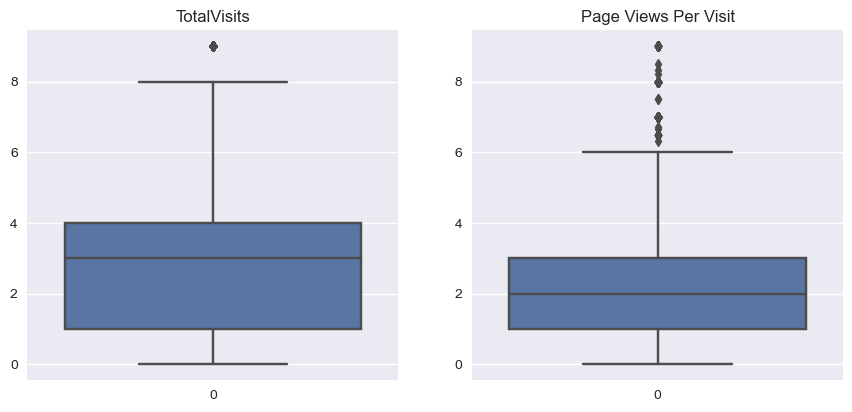

In [140]:
# Box Plots after outlier treatment
plt.figure(figsize=(22,10))
plt.subplot(2,4,1)
plt.title('TotalVisits')
sns.boxplot(leads.TotalVisits)
plt.subplot(2,4,2)
plt.title('Page Views Per Visit')
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

#### Categorical Data

In [141]:
# User defined function Used for visualisation

#Sub Plot

def subplot(features):
    for i in range(0,len(features)):
        #print(features[i])
        plt.subplot(2, 2,i+1)
        chart = (sns.countplot(x=leads[features[i]],hue=leads.Converted))

        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

         # Adding and formatting title
         #plt.title(features[i], fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'})

        # Labeling Axes
        plt.xlabel(features[i], fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
        plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
        plt.show()


#Count Plot

def count_plot(feature_name,hue,plot_title,x_lablel,y_lablel):
    chart = (sns.countplot(x=leads[feature_name],hue=hue))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

    # Adding and formatting title
    plt.title(plot_title, fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})

    # Labeling Axes
    plt.xlabel(x_lablel, fontdict={'fontsize': 8, 'fontweight' : 8, 'color' : 'Brown'})
    plt.ylabel(y_lablel, fontdict={'fontsize': 8, 'fontweight' : 8, 'color' : 'Brown'})
    plt.show()

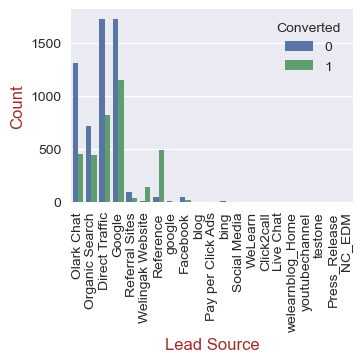

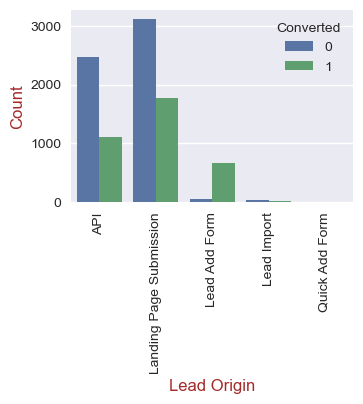

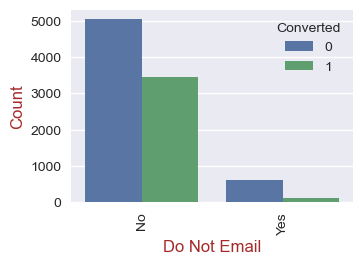

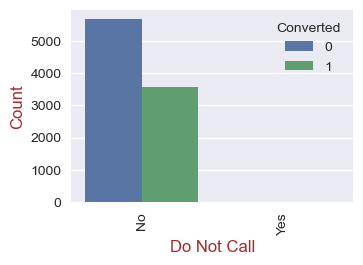

In [142]:
features = ['Lead Source','Lead Origin','Do Not Email','Do Not Call']
subplot(features)

# Data is highly skwed for Do Not call, Mostly all the data is pointing to No, hence will not make sense evaluating this feature
leads.drop('Do Not Call',axis=1,inplace=True)

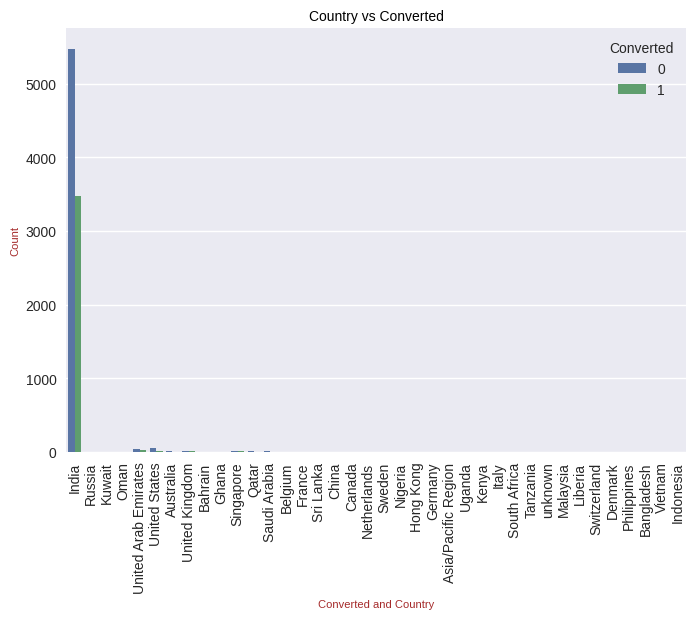

In [87]:
count_plot('Country',leads.Converted,'Country vs Converted',
           'Converted and Country','Count')

# Data is highly skwed for India, Mostly all the data is pointing to India, hence will not make sense evaluating this feature
leads.drop('Country',axis=1,inplace=True)

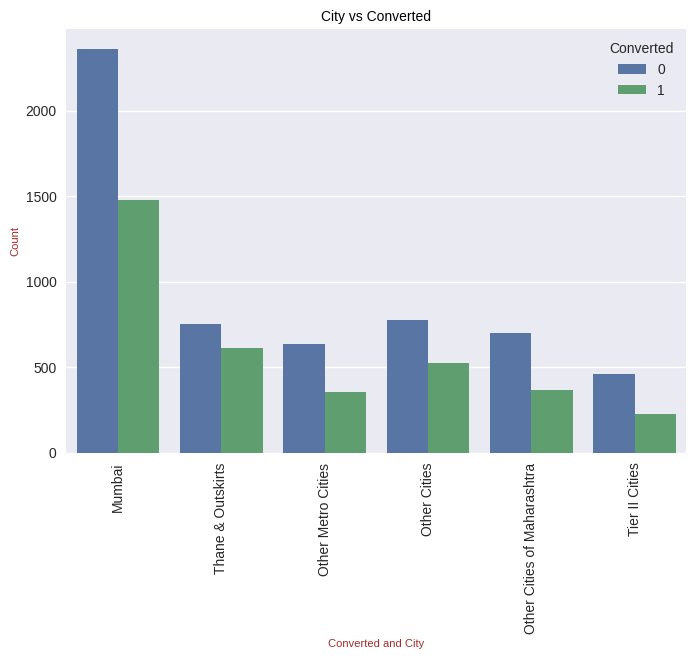

In [88]:
count_plot('City',leads.Converted,'City vs Converted',
           'Converted and City','Count')

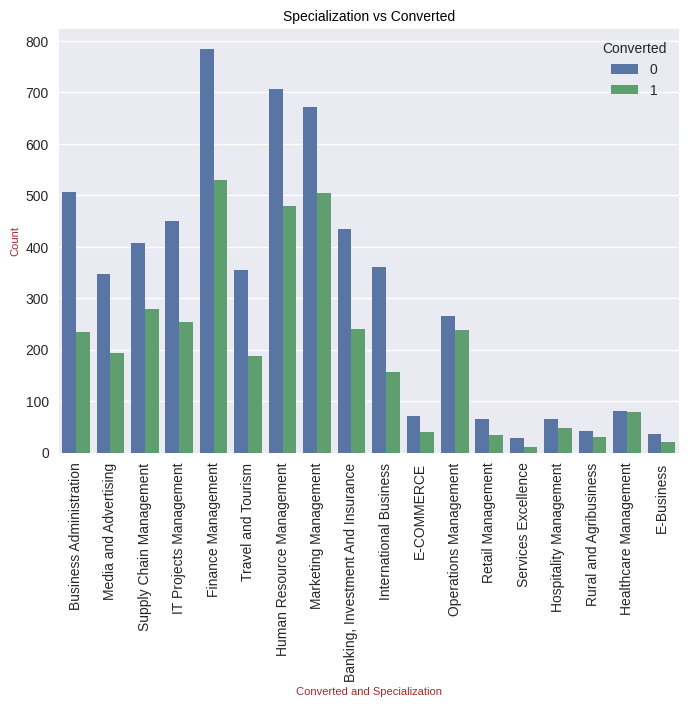

In [89]:

count_plot('Specialization',leads.Converted,'Specialization vs Converted',
           'Converted and Specialization','Count')

In [91]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   Occupation                              9240 non-null   object 
 10  Motto                                   9240 non-null   obje

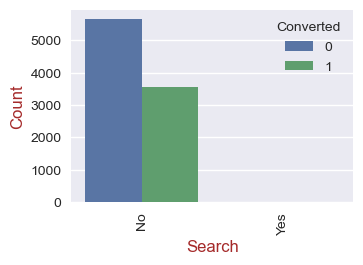

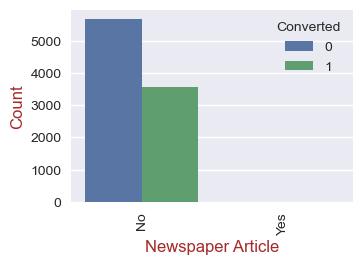

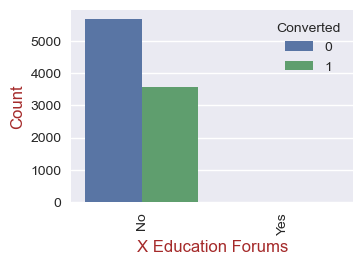

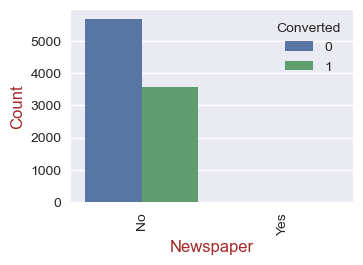

In [145]:
features = ['Search',
'Newspaper Article',
'X Education Forums',
'Newspaper']
subplot(features)

# These features are highly skewed, hence dropping
leads.drop(features, axis=1, inplace=True)

In [150]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   Occupation                              9240 non-null   object 
 10  Magazine                                9240 non-null   obje

KeyError: 'Digital Advertisement'

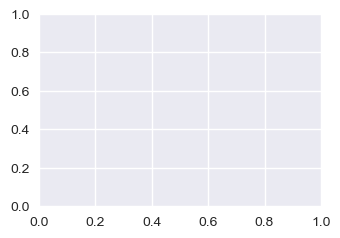

In [151]:
features = ['Digital Advertisement',
'Through Recommendations']
subplot(features)

# these are skewed to, hence dropping
leads.drop(features, axis=1, inplace=True)

In [152]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   Occupation                              9240 non-null   object 
 10  Magazine                                9240 non-null   obje

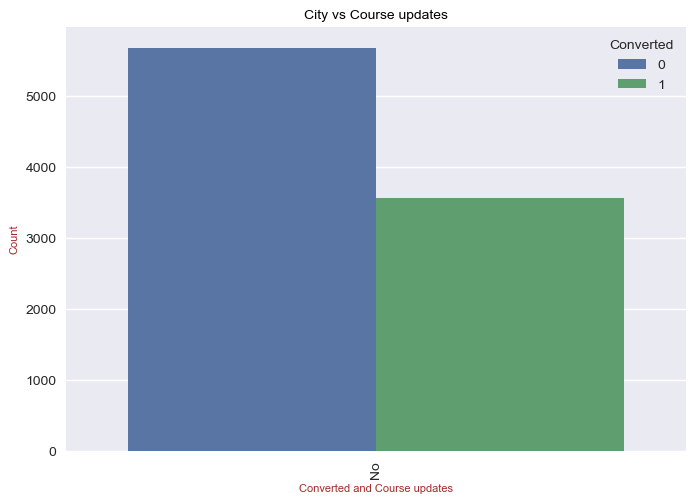

In [153]:
count_plot('GetUpdates',leads.Converted,'City vs Course updates',
           'Converted and Course updates','Count')


# Receive More Updates About Our Courses can be droped because of skewness in the data
leads.drop('GetUpdates',axis=1,inplace=True)

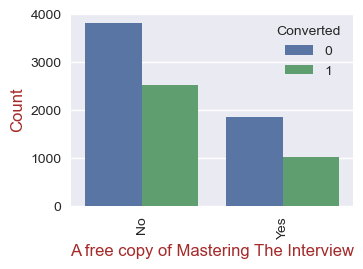

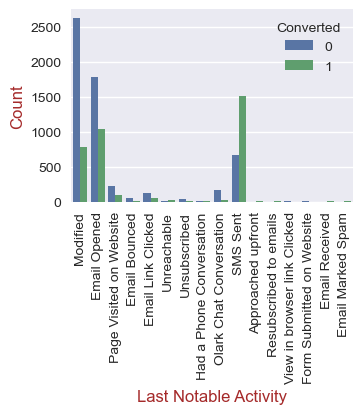

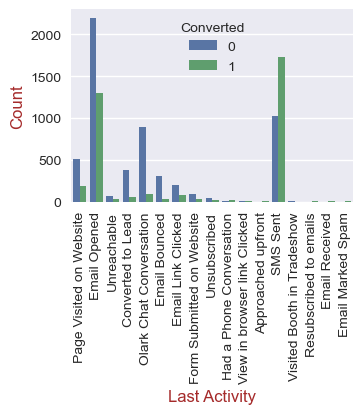

In [154]:
features = ['A free copy of Mastering The Interview','Last Notable Activity','Last Activity']
subplot(features)

# droping the columns - A free copy of Mastering The Interview because it is not putting any value in the analysis
# Last Notable Activity','Last Activity both are same, hence dropping Last Notable Activity
leads.drop(['Last Notable Activity'],axis=1,inplace=True)

In [155]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   Occupation                              9240 non-null   object 
 10  Magazine                                9240 non-null   obje

In [214]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Magazine,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Business Administration,Unemployed,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Business Administration,Unemployed,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Business Administration,Unemployed,0,0


# <h2 align="left"> <font color='brown'>Data Preperation</font></h2>

#### Dummy value creation

In [159]:
categorical = leads.select_dtypes(include=['object']).columns
categorical

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'Occupation', 'Magazine',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [161]:
def make_binary_dummy(columlist):
  return columlist.map({'No':0,'Yes':1})


catergory_list = ['Do Not Email','Magazine','A free copy of Mastering The Interview']

leads[catergory_list] = leads[catergory_list].apply(make_binary_dummy)

In [212]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Magazine,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Business Administration,Unemployed,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Business Administration,Unemployed,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Business Administration,Unemployed,0,0


In [164]:
(leads['Lead Origin'].value_counts(normalize=True))*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [202]:
value_counts = leads['Lead Source'].value_counts(normalize=True)*100
value_counts

Google            31.158009
Direct Traffic    27.586580
Olark Chat        19.058442
Organic Search    12.554113
Others             9.642857
Name: Lead Source, dtype: float64

In [203]:
low_freq_categories = value_counts [value_counts < 10].index
low_freq_categories

Index(['Others'], dtype='object')

In [201]:
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace(low_freq_categories,'Others')

In [210]:
value_counts_last_actity = leads['Last Activity'].value_counts(normalize=True)*100
value_counts_last_actity

Email Opened                 37.748918
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       7.489177
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Form Submitted on Website     1.255411
others                        1.212121
Unreachable                   1.006494
Name: Last Activity, dtype: float64

In [208]:
low_freq_last_activity_category = value_counts_last_actity[value_counts_last_actity < 1].index
low_freq_last_activity_category

Index(['Unsubscribed', 'Had a Phone Conversation', 'Approached upfront',
       'View in browser link Clicked', 'Email Received', 'Email Marked Spam',
       'Visited Booth in Tradeshow', 'Resubscribed to emails'],
      dtype='object')

In [209]:
leads['Last Activity'] = leads['Last Activity'].replace(low_freq_last_activity_category,'others')

In [215]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Magazine,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Business Administration,Unemployed,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Business Administration,Unemployed,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Business Administration,Unemployed,0,0


In [216]:
lead_origin = pd.get_dummies(leads['Lead Origin'],drop_first=True)
lead_source = pd.get_dummies(leads['Lead Source'],drop_first = True)
last_activity = pd.get_dummies(leads['Last Activity'],drop_first = True)
speciality = pd.get_dummies(leads['Specialization'],drop_first = True)
current_occu = pd.get_dummies(leads['Occupation'],drop_first = True)

In [217]:
leads = pd.concat([leads,lead_origin,lead_source,last_activity,current_occu,speciality], axis = 1)

In [218]:
leads.shape

(9240, 51)

In [219]:
leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','Occupation'],axis = 1,inplace = True )

In [248]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Do Not Email                 9240 non-null   int64  
 1   Converted                    9240 non-null   int64  
 2   TotalVisits                  9240 non-null   float64
 3   Total Time Spent on Website  9240 non-null   float64
 4   Page Views Per Visit         9240 non-null   float64
 5   Magazine                     9240 non-null   int64  
 6   Free_copy                    9240 non-null   int64  
 7   Landing Page Submission      9240 non-null   uint8  
 8   Lead Add Form                9240 non-null   uint8  
 9   Lead Import                  9240 non-null   uint8  
 10  Quick Add Form               9240 non-null   uint8  
 11  Google                       9240 non-null   uint8  
 12  Olark Chat                   9240 non-null   uint8  
 13  Organic Search    

# <h2 align="left"> <font color='brown'>Manual Feature Elimination</font></h2>

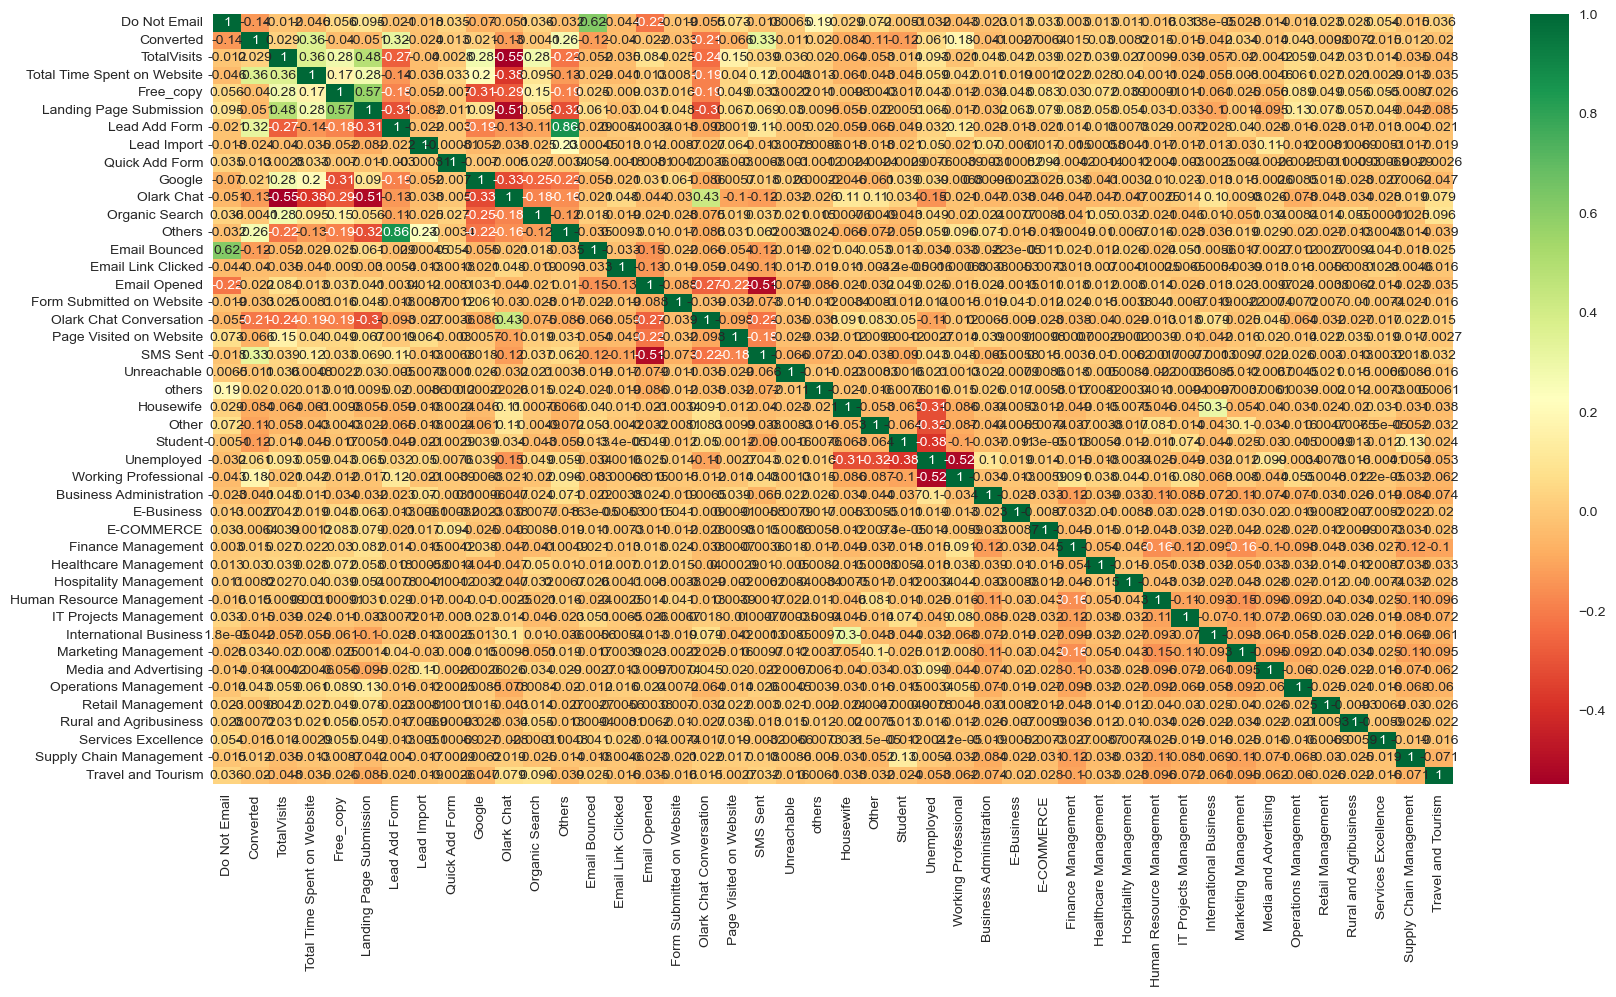

In [268]:
plt.figure(figsize = (20,10))
sns.heatmap(leads.corr(),cmap="RdYlGn", annot=True)
plt.show()

In [260]:
# Magazine is not showing any correlation, hence dropping
leads.drop('Magazine',axis=1,inplace=True)

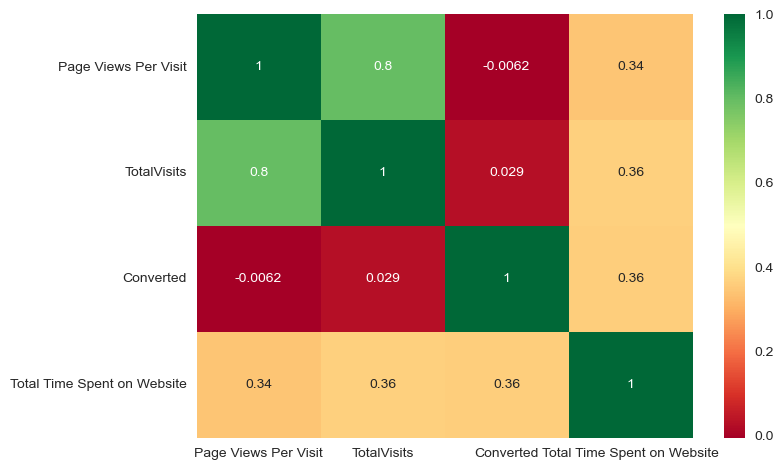

In [266]:
# Page Views Per Visit , TotalVisits showing high coorelation, Lets check seperately
features = ['Page Views Per Visit','TotalVisits','Converted','Total Time Spent on Website']
sns.heatmap(leads[features].corr(),cmap="RdYlGn", annot=True)
plt.show()

In [267]:
# High correlation between Page Views Per Visit and TotalVisits. We can drop anyone
leads.drop('Page Views Per Visit',axis=1,inplace=True)

## <h2 align="left"> <font color='brown'>Model Preperation</font></h2>

In [269]:
leads_train,leads_test = train_test_split(leads,train_size=0.7,test_size=0.3,
                                          random_state=100)

In [270]:
leads_train.shape

(6468, 44)

In [271]:
y_train = leads_train.pop('Converted')
X_train = leads_train

In [272]:
y_test = leads_test.pop('Converted')
X_test = leads_test


In [273]:
X_train.shape

(6468, 43)

#### Scale variable

In [274]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [275]:
X_train[num_cols]

,Do Not Email,TotalVisits,Total Time Spent on Website,Free_copy
1871,-0.291638,-1.251185,-0.885371,-0.673169
6795,-0.291638,0.526731,0.005716,1.485511
3516,-0.291638,0.971210,-0.691418,-0.673169
8105,-0.291638,0.971210,1.365219,-0.673169
3934,-0.291638,-1.251185,-0.885371,-0.673169
...,...,...,...,...
350,-0.291638,-1.251185,-0.885371,-0.673169
79,-0.291638,0.280151,0.404601,-0.673169
8039,-0.291638,-1.251185,-0.885371,-0.673169
6936,-0.291638,-0.362227,-0.449891,-0.673169


# <h2 align="left"> <font color='brown'>Model Training</font></h2>

#### Model 1

In [276]:
# Function to create model
def model_creation(X,y):
    model = sm.GLM(y,X,family = sm.families.Binomial()).fit()
    print(model.summary())
    return model

# Function to calculate VIF
def vif_calculator (X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [277]:
lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [279]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Free_copy', False, 22),
 ('Landing Page Submission', False, 9),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 3),
 ('Quick Add Form', True, 1),
 ('Google', False, 5),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 20),
 ('Others', False, 4),
 ('Email Bounced', False, 23),
 ('Email Link Clicked', True, 1),
 ('Email Opened', True, 1),
 ('Form Submitted on Website', True, 1),
 ('Olark Chat Conversation', True, 1),
 ('Page Visited on Website', True, 1),
 ('SMS Sent', True, 1),
 ('Unreachable', True, 1),
 ('others', True, 1),
 ('Housewife', False, 8),
 ('Other', True, 1),
 ('Student', True, 1),
 ('Unemployed', True, 1),
 ('Working Professional', True, 1),
 ('Business Administration', False, 6),
 ('E-Business', False, 21),
 ('E-COMMERCE', False, 2),
 ('Finance Management', False, 15),
 ('Healthcare Management', True, 1),
 ('Hospitality Management', True, 1),
 ('Human Resource M

In [280]:
selected_column = X_train.columns[rfe.support_]
not_selected_column = X_train.columns[~rfe.support_]

In [284]:
selected_column

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Add Form',
       'Quick Add Form', 'Olark Chat', 'Email Link Clicked', 'Email Opened',
       'Form Submitted on Website', 'Olark Chat Conversation',
       'Page Visited on Website', 'SMS Sent', 'Unreachable', 'others', 'Other',
       'Student', 'Unemployed', 'Working Professional',
       'Healthcare Management', 'Hospitality Management',
       'Rural and Agribusiness'],
      dtype='object')

In [285]:
not_selected_column

Index(['TotalVisits', 'Free_copy', 'Landing Page Submission', 'Lead Import',
       'Google', 'Organic Search', 'Others', 'Email Bounced', 'Housewife',
       'Business Administration', 'E-Business', 'E-COMMERCE',
       'Finance Management', 'Human Resource Management',
       'IT Projects Management', 'International Business',
       'Marketing Management', 'Media and Advertising',
       'Operations Management', 'Retail Management', 'Services Excellence',
       'Supply Chain Management', 'Travel and Tourism'],
      dtype='object')

In [286]:
X_train_rfe_selected = X_train[selected_column]
X_train_rfe_selected.shape

(6468, 20)

In [287]:
X_train_rfe_selected_with_constant = sm.add_constant(X_train_rfe_selected)
model_1 = model_creation(X_train_rfe_selected_with_constant,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2822.3
Date:                Sat, 13 Jan 2024   Deviance:                       5644.7
Time:                        02:54:53   Pearson chi2:                 6.79e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3666
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [288]:
vif_calculator(X_train_rfe_selected_with_constant)

                      Variables        VIF
0                         const  23.739106
7                  Email Opened   4.235996
11                     SMS Sent   3.790489
16                   Unemployed   2.720874
9       Olark Chat Conversation   2.553746
17         Working Professional   2.059613
10      Page Visited on Website   1.907080
15                      Student   1.597289
5                    Olark Chat   1.471648
14                        Other   1.429546
6            Email Link Clicked   1.404437
1                  Do Not Email   1.272529
2   Total Time Spent on Website   1.244850
8     Form Submitted on Website   1.170537
13                       others   1.140260
12                  Unreachable   1.113823
3                 Lead Add Form   1.109000
19       Hospitality Management   1.007412
18        Healthcare Management   1.006396
4                Quick Add Form   1.004860
20       Rural and Agribusiness   1.004674


## Model 2

In [289]:
# Facebook is having figh VIF and high p value
X_train_rfe_selected_with_constant_revised = X_train_rfe_selected_with_constant.drop('Quick Add Form',axis=1)

In [290]:
model_2 = model_creation(X_train_rfe_selected_with_constant_revised,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2823.0
Date:                Sat, 13 Jan 2024   Deviance:                       5646.0
Time:                        02:55:04   Pearson chi2:                 6.79e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3665
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Model 3

In [323]:
# Facebook is having figh VIF and high p value
drop_feature = ['Quick Add Form','Olark Chat Conversation','Other','Healthcare Management',
                'Rural and Agribusiness','Form Submitted on Website','Student']
X_train_rfe_selected_with_constant_revised = X_train_rfe_selected_with_constant.drop(drop_feature
                                                                                     ,axis=1)

In [324]:
model_3 = model_creation(X_train_rfe_selected_with_constant_revised,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2833.8
Date:                Sat, 13 Jan 2024   Deviance:                       5667.7
Time:                        03:13:40   Pearson chi2:                 6.78e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3643
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [325]:
vif_calculator(X_train_rfe_selected_with_constant)

                      Variables        VIF
0                         const  23.739106
7                  Email Opened   4.235996
11                     SMS Sent   3.790489
16                   Unemployed   2.720874
9       Olark Chat Conversation   2.553746
17         Working Professional   2.059613
10      Page Visited on Website   1.907080
15                      Student   1.597289
5                    Olark Chat   1.471648
14                        Other   1.429546
6            Email Link Clicked   1.404437
1                  Do Not Email   1.272529
2   Total Time Spent on Website   1.244850
8     Form Submitted on Website   1.170537
13                       others   1.140260
12                  Unreachable   1.113823
3                 Lead Add Form   1.109000
19       Hospitality Management   1.007412
18        Healthcare Management   1.006396
4                Quick Add Form   1.004860
20       Rural and Agribusiness   1.004674


### <h2 align="left"> <font color='brown'>Model Evaluation</font></h2>

In [348]:
# Getting the predicted values on the train set
y_train_pred = model_3.predict(X_train_rfe_selected_with_constant_revised)

y_train_pred[:10]

1871    0.282607
6795    0.254102
3516    0.328117
8105    0.824298
3934    0.282607
4844    0.951915
3297    0.131054
8071    0.987760
987     0.153344
7423    0.902093
dtype: float64

In [349]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted_original':y_train.values, 'Converted_Prob':y_train_pred})

y_train_pred_final.head()

,Converted_original,Converted_Prob
1871,0,0.282607
6795,0,0.254102
3516,0,0.328117
8105,0,0.824298
3934,0,0.282607


In [350]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head(10)

,Converted_original,Converted_Prob,Predicted
1871,0,0.282607,0
6795,0,0.254102,0
3516,0,0.328117,0
8105,0,0.824298,1
3934,0,0.282607,0
4844,1,0.951915,1
3297,0,0.131054,0
8071,1,0.987760,1
987,0,0.153344,0
7423,1,0.902093,1


In [352]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted_original, y_train_pred_final.Predicted )
print(confusion)

[[3539  463]
 [ 788 1678]]


In [353]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3539       |   463
# converted           788        |   1678  


#### Other Metrices

In [371]:
def metirices(confusion_matrix):
    TN = confusion_matrix[0,0]
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    TP = confusion_matrix[1,1]
    
    print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted_original, 
                                                       y_train_pred_final.Predicted)*100)
    print('Sensitity : ',(TP / float(TP+FN))*100)
    print('Specificity : ', (TN / float(TN+FP))*100)
    print('False Positive Rate : ',(FP/ float(TN+FP))*100)
    print('precision : ',(TP / float(TP+FP))*100)
                  
    

In [372]:
metirices(confusion)

Accuracy : 80.65862708719852
Sensitity :  68.04541768045418
Specificity :  88.43078460769615
False Positive Rate :  11.569215392303848
precision :  78.37459131247081


### <h2 align="left"> <font color='brown'>ROC Curve</font></h2>

In [374]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [375]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted_original, 
                                         y_train_pred_final.Converted_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)